<a href="https://colab.research.google.com/github/kurkur19/Neural_networks_Al_Khmuz_BS_25/blob/main/7lab_NN_Al_Khmuz_BS_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПРАКТИЧНА РОБОТА 7: РОЗРОБКА СІАМСЬКОЇ МЕРЕЖІ (SIAMESE NETWORKS)

##*Мета роботи:*

Ознайомитись із принципами роботи сіамських мереж, їх
застосуваннями в завданнях порівняння та верифікації об'єктів, а також
навчитися практичним навичкам створення та навчання сіамської мережі в Keras.

Виконала студентка групи БС-25 Аль Хмуз Карина Бассамівна (1 варіант)

##*Теоретична частина:*

***Сіамська мережа*** – це архітектура нейронних мереж, яка використовується,
головним чином, для вирішення задачі порівняння або визначення схожості між
двома входами. Вона складається з двох ідентичних підмереж, які розділяють ті ж самі параметри та ваги. Обидві підмережі приймають різні вхідні дані та виводять ознаки, які потім порівнюються.

**Основна ідея:**

- *Схожість:* Основна мета сіамської мережі – визначити, наскільки схожі між
собою два вхідні зразка. Замість класичного класифікаційного виводу, який
каже, до якого класу належить зразок, сіамська мережа визначає ступінь
схожості між двома зразками.

- *Спільне навчання:* Обидві підмережі в сіамській архітектурі навчаються
одночасно. Якщо покращуються ознаки, що виділяються однією
підмережею, це також покращує ознаки, що виділяються іншою.

- *Оцінка відстані:* Після того як обидві підмережі вивели свої ознаки для
вхідних даних, відстань між цими ознаками визначається за допомогою
деякої метрики (наприклад, евклідова відстань).

- *Порогове значення:* Якщо обчислена відстань менша за певне порогове
значення, зразки вважаються схожими, в іншому випадку – різними.

- *Особливості застосування:* Сіамські мережі часто використовуються у
задачах, де доступні малі набори даних, таких як верифікація обличчя.
Замість навчання на величезних датасетах з тисячами класів, сіамська
мережа може навчатися, порівнюючи лише кілька зразків кожного класу, і
все одно розпізнавати нові приклади цих класів.

**Особливості архітектури Сіамських мереж.**

1. Двійкові підмережі:

Сіамська мережа має дві підмережі, які зазвичай є ідентичними та ділять однакові
параметри. Ці підмережі використовуються для видобутку ознак з двох окремих
вхідних даних.

2. Ваги розділяються:

Обидві підмережі ділять однакові ваги, що означає, що вони одночасно
оновлюються під час процесу навчання.

3. Відстань між ознаками:

Після того, як ознаки видобуто з обох підмереж, вони порівнюються. Зазвичай
використовується евклідова відстань або інші метрики для визначення схожості
між двома наборами ознак.

4. Контрастна втрата (contrastive loss):

Для навчання сіамської мережі зазвичай використовується контрастна втрата. Ця
функція втрати вимірює, наскільки близько ознаки схожих об'єктів і наскільки
далеко ознаки різних об'єктів.

5. Якір, позитивний та негативний приклади:

Під час тренування зазвичай використовуються три зразки: "якір" (основний
зразок), позитивний зразок (той, що схожий на якір) та негативний зразок (той, що відрізняється від якоря). Це стимулює мережу правильно розпізнавати схожі та відмінні об'єкти.


##Практична частина

###Етап 1: Створення сіамської мережі

Так як я, Аль Хмуз Карина Бассамівна маю перший варіант, то датасет для мого завдання - **Fashion MNIST**

Для початку ми завантажимо датасет Fashion MNIST та зробимо огляд даних, щоб зрозуміти його структуру та типи зображень.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train data shape: (60000, 28, 28), Train labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


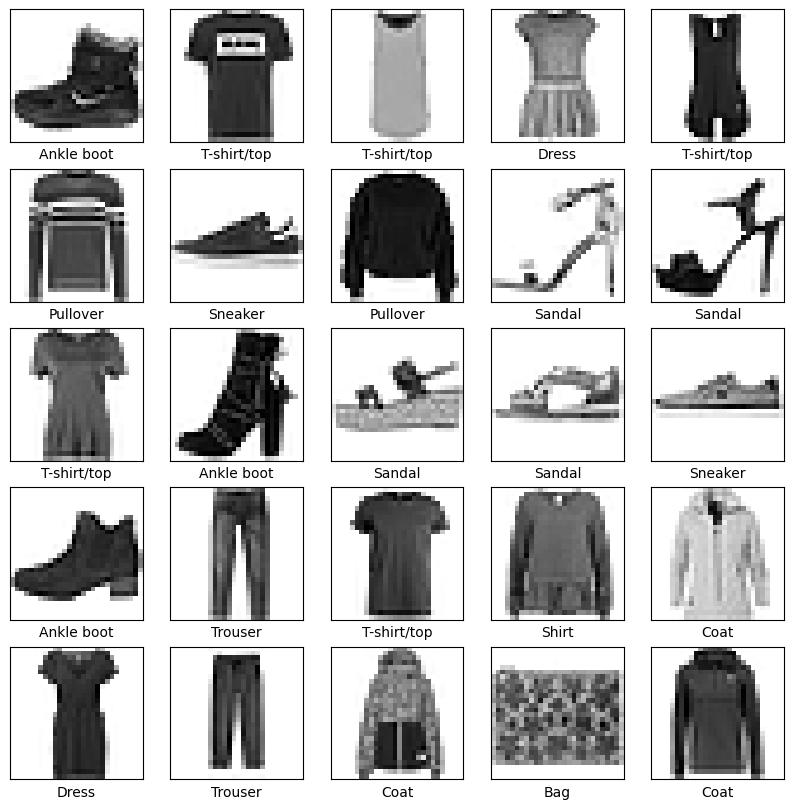

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Завантаження датасету
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Виведення розмірів датасету
print(f"Train data shape: {x_train.shape}, Train labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")

# Візуалізація прикладів із датасету
def plot_samples(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

# Класи в датасеті
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_samples(x_train, y_train, class_names)


Зображення в датасеті Fashion MNIST мають низьку якість через їх розмір — 28x28 пікселів. Це зроблено для збереження компактності даних, прискорення обчислень і зниження вимог до апаратного забезпечення.

*датасет спочатку розроблявся для тестування алгоритмів машинного навчання. Навіть така низька роздільна здатність дозволяє отримати важливі ознаки для класифікації за допомогою нейронних мереж.

Наступним кроком буде підготовка даних для сіамської мережі. Нам потрібно створити пари зображень для навчання моделі та вказати мітки, які позначають, чи є зображення в парі схожими (з одного класу) чи різними (з різних класів).

In [2]:
def create_pairs(images, labels):
    pairs = []
    labels_pairs = []
    digit_indices = [np.where(labels == i)[0] for i in range(10)]
    min_samples = min([len(indices) for indices in digit_indices]) - 1

    for digit in range(10):
        for i in range(min_samples):
            # Позитивна пара (схожі зображення)
            z1, z2 = digit_indices[digit][i], digit_indices[digit][i + 1]
            pairs += [[images[z1], images[z2]]]
            labels_pairs += [1]

            # Негативна пара (різні зображення)
            inc = np.random.randint(1, 10)
            dn = (digit + inc) % 10
            z1, z2 = digit_indices[digit][i], digit_indices[dn][i]
            pairs += [[images[z1], images[z2]]]
            labels_pairs += [0]

    return np.array(pairs), np.array(labels_pairs)

# Створення пар для тренувального та тестового наборів
train_pairs, train_labels = create_pairs(x_train, y_train)
test_pairs, test_labels = create_pairs(x_test, y_test)

# Перевірка форми даних
print(f"Train pairs shape: {train_pairs.shape}, Train labels shape: {train_labels.shape}")
print(f"Test pairs shape: {test_pairs.shape}, Test labels shape: {test_labels.shape}")


Train pairs shape: (119980, 2, 28, 28), Train labels shape: (119980,)
Test pairs shape: (19980, 2, 28, 28), Test labels shape: (19980,)


Ми успішно створили пари для навчання та тестування.

- Train pairs shape: (119980, 2, 28, 28): Маємо 119,980 пар зображень у тренувальному наборі. Кожна пара складається з двох зображень розміром 28x28 пікселів.

- Train labels shape: (119980,): Для кожної пари є відповідна мітка (1 — схожі, 0 — різні).

- Test pairs shape: (19980, 2, 28, 28): Тестовий набір містить 19,980 пар зображень.

- Test labels shape: (19980,): Відповідні мітки для тестових пар.


Тепер ми побудуємо базову підмережу для нашої сіамської мережі. Це підмережа, яка буде використовуватись для витягування ознак із кожного зображення в парі.

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

In [4]:
def create_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Ініціалізація базової підмережі
input_shape = (28, 28)
base_network = create_base_network(input_shape)

# Перевірка структури базової підмережі
base_network.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

Чудово, наша базова підмережа готова! Це означає, що ми можемо використовувати її для витягування ознак із зображень у нашій сіамській мережі.

Тепер ми створимо повну сіамську мережу, яка прийматиме пари зображень і порівнюватиме їх за допомогою евклідової відстані.

In [5]:
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

In [6]:
# Функція для обчислення евклідової відстані
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

# Вхідні шари для пар зображень
input_a = Input(shape=(28, 28))
input_b = Input(shape=(28, 28))

# Пропускання обох входів через базову підмережу
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Обчислення відстані між ознаками
distance = Lambda(euclidean_distance)([processed_a, processed_b])

# Побудова моделі
from tensorflow.keras.models import Model
model = Model(inputs=[input_a, input_b], outputs=distance)

# Огляд архітектури моделі
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 28, 28)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 128)            │        133,504 │ input_layer_1[0][0],   │
│                           │                        │                │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1)              │              0 │ functional[0][0],      │
│                           │                        │                │ functional[1][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 133,504 (521.50 KB)

 Trainable params: 133,504 (521.50 KB)

 Non-trainable params: 0 (0.00 B)

Тепер ми компілюємо модель, використовуючи функцію втрат contrastive loss, і навчаємо її на підготовлених парах.

In [7]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K

In [8]:
# Функція втрат для сіамської мережі
def contrastive_loss(y_true, y_pred):
    margin = 1
    y_true = K.cast(y_true, 'float32')
    sqaure_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * sqaure_pred + (1 - y_true) * margin_square)

# Компіляція моделі
model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

# Навчання моделі
history = model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4925 - loss: 1755.0818 - val_accuracy: 0.5001 - val_loss: 0.5007
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5019 - loss: 0.5076 - val_accuracy: 0.3763 - val_loss: 0.3239
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3400 - loss: 0.2818 - val_accuracy: 0.2832 - val_loss: 0.2813
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2990 - loss: 0.2166 - val_accuracy: 0.2775 - val_loss: 0.2771
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.2967 - loss: 0.2079 - val_accuracy: 0.2611 - val_loss: 0.2601
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2788 - loss: 0.2095 - val_accuracy: 0.2612 - val_loss: 0.2595
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2815 - loss: 0.2117 - val_accuracy: 0.2741 - val_loss: 0.2740
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.2914 - loss: 0.1989 

In [9]:
import matplotlib.pyplot as plt

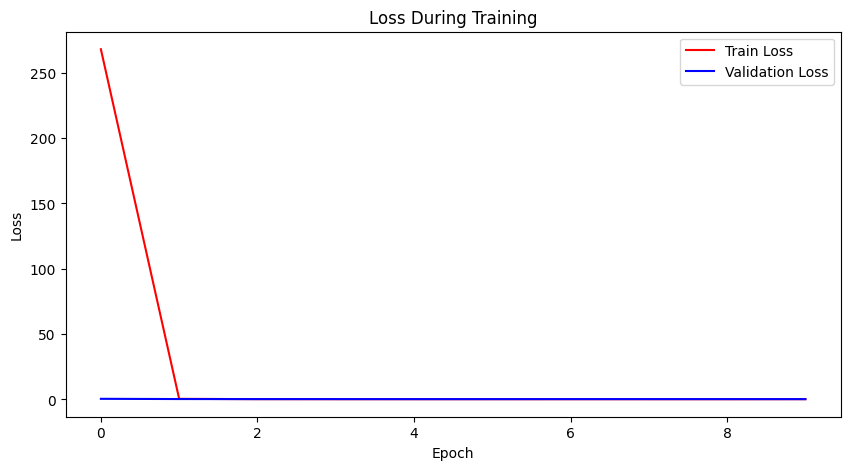

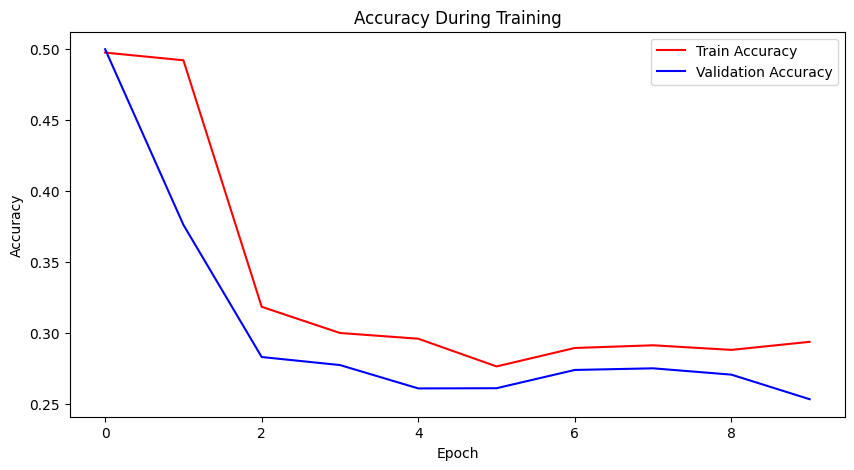

In [14]:
# Графік втрат
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Графік точності
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='blue')
plt.title('Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


####**Аналіз графіків**

Графік втрат (Loss During Training): На першому графіку показано динаміку функції втрат (loss) під час навчання. Спостерігається різке зниження втрат на початкових епохах навчання, що свідчить про те, що модель швидко адаптується до даних на ранніх етапах. Однак, валідаційні втрати залишаються стабільними, що може свідчити про недостатню здатність моделі узагальнювати результати на тестових даних. Для покращення результатів варто розглянути зміни в архітектурі моделі або її параметрах.

Графік точності (Accuracy During Training): На другому графіку відображено динаміку точності (accuracy) на тренувальному та валідаційному наборах. Точність на тренувальних даних демонструє зниження після початкових епох, що вказує на можливу проблему з перенавчанням або нестачею якості у вхідних даних. Валідаційна точність також має тенденцію до зниження, що може вказувати на недосконалість моделі у розрізненні схожих та різних пар зображень.

###Етап 2: Вплив регуляризації та нормалізації


Регуляризація та нормалізація допомагають уникнути перенавчання. Ми додамо BatchNormalization та змінюватимемо рівень Dropout, щоб оцінити вплив.

In [15]:
from tensorflow.keras.layers import BatchNormalization

In [16]:
def create_improved_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Flatten()(input_layer)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)  # Нормалізація після Dense
    x = Dropout(0.3)(x)  # Підвищення Dropout
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Створюємо нову базову підмережу
improved_base_network = create_improved_base_network(input_shape)

# Побудова нової сіамської мережі з покращеною базовою підмережою
input_a = Input(shape=(28, 28))
input_b = Input(shape=(28, 28))

processed_a = improved_base_network(input_a)
processed_b = improved_base_network(input_b)

distance = Lambda(euclidean_distance)([processed_a, processed_b])

improved_model = Model(inputs=[input_a, input_b], outputs=distance)


In [17]:
# Компіляція та навчання
improved_model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

history_improved = improved_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.3746 - loss: 7.4191 - val_accuracy: 0.1327 - val_loss: 0.1070
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1360 - loss: 0.1084 - val_accuracy: 0.1185 - val_loss: 0.0898
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.1209 - loss: 0.0955 - val_accuracy: 0.1143 - val_loss: 0.0859
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.1122 - loss: 0.0888 - val_accuracy: 0.1072 - val_loss: 0.0816
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.1050 - loss: 0.0845 - val_accuracy: 0.1071 - val_loss: 0.0824
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1039 - loss: 0.0834 - val_accuracy: 0.0992 - val_loss: 0.0792
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.1015 - loss: 0.0815 - val_accuracy: 0.1010 - val_loss: 0.0779
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.1005 - loss: 0.0807 - 

Після другого навчання з регуляризацією та нормалізацією втрати на тренувальному наборі знизилися до значення +-0.0781, що свідчить про стабільність моделі, а валідаційні втрати залишилися на тому ж рівні, що вказує на відсутність перенавчання. Однак точність на тренувальних і валідаційних наборах залишається дуже низькою (~10%), що свідчить про нездатність моделі ефективно розрізняти схожі та різні пари. Це може бути пов’язано з тим, що навіть із регуляризацією та нормалізацією базова підмережа недостатньо складна для виділення якісних ознак.

###Етап 3: Зміна архітектури базової підмережі

Але давайте перейдемо до більш складної та спеціалізованої архітектури, заснованої на згорткових шарах (CNN). Вона значно краще працює з зображеннями, тому ми очікуємо покращення.

Замість повнозв’язних шарів (Dense) ми використаємо згорткові шари (CNN), які краще працюють із зображеннями.

In [20]:
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
def create_cnn_base_network(input_shape):
    input_layer = Input(shape=input_shape)
    x = Reshape((28, 28, 1))(input_layer)  # Додамо канал для CNN
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    return Model(input_layer, x)

# Створюємо CNN-базову підмережу
cnn_base_network = create_cnn_base_network(input_shape)

# Побудова нової сіамської мережі з CNN
processed_a = cnn_base_network(input_a)
processed_b = cnn_base_network(input_b)

distance_cnn = Lambda(euclidean_distance)([processed_a, processed_b])

cnn_model = Model(inputs=[input_a, input_b], outputs=distance_cnn)


In [22]:
# Компіляція та навчання
cnn_model.compile(loss=contrastive_loss, optimizer=RMSprop(), metrics=["accuracy"])

history_cnn = cnn_model.fit(
    [train_pairs[:, 0], train_pairs[:, 1]],
    train_labels,
    validation_data=([test_pairs[:, 0], test_pairs[:, 1]], test_labels),
    batch_size=128,
    epochs=10
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 225s 238ms/step - accuracy: 0.4972 - loss: 43.6589 - val_accuracy: 0.5001 - val_loss: 0.5033
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 224s 238ms/step - accuracy: 0.4968 - loss: 0.5781 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 248s 224ms/step - accuracy: 0.4999 - loss: 0.4996 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 265s 227ms/step - accuracy: 0.4981 - loss: 0.4978 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 259s 224ms/step - accuracy: 0.4998 - loss: 0.4995 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.4988 - loss: 0.4985 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 261s 224ms/step - accuracy: 0.5021 - loss: 0.5017 - val_accuracy: 0.5001 - val_loss: 0.5003
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 210s 224ms/step - accuracy: 0.5017 

*використання CNN-архітектури додає часу на навчання, оскільки згорткові шари значно збільшують обчислювальну складність.